# Welcome to AI Summer School! 🤖

## What You'll Discover Today

Welcome to your first hands-on experience with Artificial Intelligence! Whether you're already comfortable with programming or new to coding, this notebook will demonstrate some impressive AI applications that are shaping our world right now.

**Don't worry about understanding every line of code** - the focus is on seeing AI in action and understanding its potential impact.

### Today's AI Demonstrations:
1. **Sentiment Analysis** - How computers interpret human emotions in text
2. **Computer Vision** - Object detection and image analysis
3. **Neural Style Transfer** - AI-powered artistic image transformation
4. **Text Similarity** - Measuring semantic relationships between sentences
5. **Current AI Tools** - Exploring today's most influential AI applications

**Ready to explore?** Let's begin.

## Running in Google Colab

Google Colab provides free access to GPUs and has most AI libraries pre-installed, making it ideal for AI experimentation. Here's how to use this notebook effectively:

### Getting Started:
1. **Execute cells sequentially** - Click the play button (▶️) or use `Shift + Enter`
2. **Wait for completion** - Let each cell finish before proceeding
3. **Ignore warnings** - Most are informational and won't affect functionality
4. **Experiment freely** - Feel free to modify parameters and try different inputs

### Useful Tips:
- **Runtime menu**: Use "Restart and run all" if you need a fresh start
- **Save your work**: File → Save a copy in Drive
- **GPU acceleration**: Runtime → Change runtime type → GPU (if available)

---

## Setting Up Our AI Environment

Before we begin, we need to install and import the necessary AI libraries. These include:

- **Transformers**: Pre-trained language models from Hugging Face
- **TensorFlow**: Google's machine learning framework
- **OpenCV & PIL**: Image processing libraries
- **NumPy & Pandas**: Data manipulation tools
- **Matplotlib**: Visualisation library

The setup process involves two steps: installation and importing.

### Installing Required Packages:

In [1]:
# Install required packages for this notebook
print("Installing AI libraries for Google Colab...")
print("This may take 2-3 minutes on first run.")

!pip install -q transformers torch tensorflow-hub opencv-python-headless
!pip install -q --upgrade tensorflow

print("Installation complete. Ready to proceed.")

Installing AI libraries for Google Colab...
This may take 2-3 minutes on first run.
Installation complete. Ready to proceed.


### Importing Libraries:

In [2]:
# Environment check - verify we're running in Google Colab
try:
    import google.colab
    print("Running in Google Colab environment")
    
    import tensorflow as tf
    # Check for GPU availability
    if tf.config.list_physical_devices('GPU'):
        print("GPU acceleration available")
    else:
        print("Using CPU (still suitable for this demonstration)")
    
except ImportError:
    print("Running in standard Jupyter environment")
    print("Consider using Google Colab for optimal performance")

print("\nEnvironment setup complete")

Running in standard Jupyter environment
Consider using Google Colab for optimal performance

Environment setup complete


In [4]:
# Import essential libraries
import numpy as np              # Numerical computing
import pandas as pd             # Data manipulation
import matplotlib.pyplot as plt # Plotting and visualisation
import requests                 # HTTP requests for image downloads
from PIL import Image          # Image processing
from io import BytesIO         # Binary I/O operations

# Machine learning and AI libraries
import tensorflow as tf        # Deep learning framework
import tensorflow_hub as hub   # Pre-trained model repository
import torch                   # PyTorch deep learning framework
from transformers import pipeline, BertModel, BertTokenizer  # NLP models
from sklearn.metrics.pairwise import cosine_similarity       # Similarity metrics

# Colab-specific image display
# import cv2
# from google.colab.patches import cv2_imshow

print("All libraries imported successfully")
print("Ready for AI demonstrations")

All libraries imported successfully
Ready for AI demonstrations


## Section 1: Sentiment Analysis
**Understanding Emotions in Text**

Sentiment analysis is a fundamental NLP task that determines the emotional tone of text. It's widely used in business applications like customer feedback analysis, social media monitoring, and market research.

We'll use a pre-trained model to analyse various text samples and observe its performance.

In [5]:
# Load pre-trained sentiment analysis model
print("Loading sentiment analysis model...")
sentiment_analysis = pipeline("sentiment-analysis")
print("Model loaded successfully")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Loading sentiment analysis model...


Device set to use mps:0


Model loaded successfully


In [6]:
# Sample texts with varying sentiment
texts = [
    "I absolutely love this sunny weather!",
    "This traffic jam is incredibly frustrating",
    "The movie was okay, nothing special",
    "I'm feeling a bit down today",
    "This pizza is amazing!",
    "I can't believe my team won the championship!"
]

print("Sample texts for analysis:")
for i, text in enumerate(texts, 1):
    print(f"{i}. {text}")

Sample texts for analysis:
1. I absolutely love this sunny weather!
2. This traffic jam is incredibly frustrating
3. The movie was okay, nothing special
4. I'm feeling a bit down today
5. This pizza is amazing!
6. I can't believe my team won the championship!


In [7]:
# Analyse sentiment for each text sample
print("Sentiment Analysis Results:")
print("=" * 50)

results = sentiment_analysis(texts)

# Display results with confidence scores
for text, result in zip(texts, results):
    sentiment_icon = "+" if result['label'] == 'POSITIVE' else "-"
    confidence = result['score'] * 100
    
    print(f"{sentiment_icon} \"{text}\"")
    print(f"   Prediction: {result['label']} (Confidence: {confidence:.1f}%)")
    print("-" * 40)

Sentiment Analysis Results:
+ "I absolutely love this sunny weather!"
   Prediction: POSITIVE (Confidence: 100.0%)
----------------------------------------
- "This traffic jam is incredibly frustrating"
   Prediction: NEGATIVE (Confidence: 99.9%)
----------------------------------------
- "The movie was okay, nothing special"
   Prediction: NEGATIVE (Confidence: 99.5%)
----------------------------------------
- "I'm feeling a bit down today"
   Prediction: NEGATIVE (Confidence: 99.9%)
----------------------------------------
+ "This pizza is amazing!"
   Prediction: POSITIVE (Confidence: 100.0%)
----------------------------------------
+ "I can't believe my team won the championship!"
   Prediction: POSITIVE (Confidence: 99.9%)
----------------------------------------


In [8]:
# Interactive testing - try your own text
# Modify the text below to test different examples

your_text = "Replace this with your own message to test"

# Analyse your custom text
your_result = sentiment_analysis([your_text])[0]
sentiment_icon = "+" if your_result['label'] == 'POSITIVE' else "-"
confidence = your_result['score'] * 100

print("Your Custom Text Analysis:")
print(f"{sentiment_icon} \"{your_text}\"")
print(f"   Prediction: {your_result['label']} (Confidence: {confidence:.1f}%)")
print("\nTry modifying the text above to test different phrases and expressions.")

Your Custom Text Analysis:
- "Replace this with your own message to test"
   Prediction: NEGATIVE (Confidence: 99.9%)

Try modifying the text above to test different phrases and expressions.


### Challenge 1: Testing Model Limitations

**Objective**: Explore edge cases where sentiment analysis might struggle.

**Try these examples**:
- Sarcastic statements: "Oh great, another Monday..."
- Mixed emotions: "I'm happy it's over but sad to leave"
- Context-dependent phrases: "This is sick!" (slang vs. literal)
- Cultural references or idioms

**Discussion points**:
- How do confidence scores relate to your intuitive assessment?
- What types of text seem to confuse the model?
- How might training data bias affect results? 

## Section 2: Computer Vision - Object Detection
**Automated Visual Recognition**

Object detection is a computer vision task that identifies and locates objects within images. This technology powers applications like autonomous vehicles, security systems, and photo organisation tools.

We'll use a pre-trained model to analyse images and identify detected objects.

In [9]:
# Utility function for downloading and displaying images
def display_image(url, title="Image"):
    try:
        print(f"Downloading image from: {url}")
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        
        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(title, fontsize=14)
        plt.axis('off')
        plt.show()
        
        print(f"Image loaded - Size: {img.size}")
        return img, np.array(img)
    except Exception as e:
        print(f"Error loading image: {e}")
        return None, None

In [10]:
# Load pre-trained object detection model
print("Loading object detection model...")
print("This model was trained on the COCO dataset with 80+ object categories")
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")
print("Model loaded successfully")

Loading object detection model...
This model was trained on the COCO dataset with 80+ object categories
Model loaded successfully


In [11]:
# Select test image - urban street scene
image_url = "https://images.unsplash.com/photo-1449824913935-59a10b8d2000?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1000&q=80"

print("Test image: Urban street scene")

Test image: Urban street scene


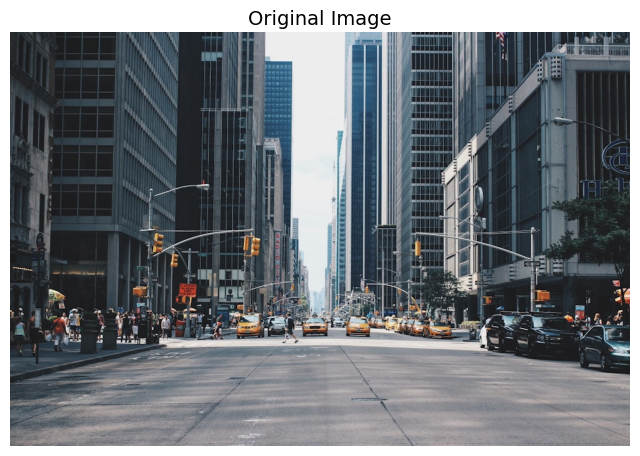

Image loaded - Size: (1000, 667)


In [12]:
# Load and display the test image
img, imgarray = display_image(image_url, "Original Image")

In [13]:
# Prepare image for model input
print("Preprocessing image for analysis...")
img = img.resize((640, 480))  # Resize to model's expected input size
img_tensor = tf.convert_to_tensor(np.array(img), dtype=tf.uint8)
img_tensor = tf.expand_dims(img_tensor, axis=0)  # Add batch dimension
print("Image preprocessing complete")

Preprocessing image for analysis...
Image preprocessing complete


In [14]:
# Run object detection inference
print("Running object detection...")
print("Identifying objects and their locations...")
result = detector(img_tensor)
print("Detection complete")

Running object detection...
Identifying objects and their locations...
Detection complete


In [15]:
# Function to draw bounding boxes on the image
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.5):
    colors = list(plt.cm.tab20(np.linspace(0, 1, 20)))
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(min(max_boxes, boxes.shape[0])):
        if scores[i] >= min_score:
            color = colors[int(class_names[i]) % len(colors)]
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            image = cv2.rectangle(image, (int(xmin * img.width), int(ymin * img.height)),
                                  (int(xmax * img.width), int(ymax * img.height)), color, 2)
            image = cv2.putText(image, str(int(class_names[i])), (int(xmin * img.width), int(ymin * img.height) - 10),
                                font, 0.5, color, 2)
    return image

In [16]:
# Extract detection results
boxes = result["detection_boxes"][0].numpy()
class_names = result["detection_classes"][0].numpy()
scores = result["detection_scores"][0].numpy()

In [17]:
# Draw bounding boxes on the image
output_img = draw_boxes(np.array(img), boxes, class_names, scores)

In [18]:
# Display detection results
print("Object Detection Results:")

# Use cv2_imshow for Colab compatibility
cv2_imshow(output_img)

# Also display with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Objects with Bounding Boxes", fontsize=16)
plt.axis('off')
plt.show()

print("Each coloured box represents a detected object with its class ID")

Object Detection Results:


NameError: name 'cv2_imshow' is not defined

### Challenge 2: Model Robustness Testing

**Objective**: Test the object detection model with challenging scenarios.

**Suggested test cases**:
- Crowded scenes with overlapping objects
- Unusual viewing angles or lighting conditions  
- Abstract or artistic images
- Very small or very large scale objects
- Partially occluded objects

**Image search suggestions**:
- "crowded marketplace"
- "abstract geometric art"
- "extreme close-up photography"
- "low light photography"

**Analysis questions**:
- What object categories does the model handle well/poorly?
- How does object size affect detection accuracy?
- What are the implications for real-world applications like autonomous vehicles? 

## Section 3: Neural Style Transfer
**Artistic Image Transformation**

Neural style transfer combines the content of one image with the artistic style of another using deep neural networks. This technique demonstrates how AI can learn and apply artistic patterns, with applications in creative industries and image processing.

Let's explore this fascinating intersection of art and technology.

In [19]:
# Load AI artist model
print("🎨 Loading AI art studio...")
print("   This AI learned from thousands of famous paintings!")
style_transfer_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
print("✅ AI artist ready to create masterpieces!")

🎨 Loading AI art studio...
   This AI learned from thousands of famous paintings!
✅ AI artist ready to create masterpieces!


In [20]:
# Choose our content image (what we want to paint) and style image (how we want to paint it)
content_image_url = "https://images.unsplash.com/photo-1535930891776-0c2dfb7fda1a?ixlib=rb-4.0.3&auto=format&fit=crop&w=400&q=80"
style_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/400px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"

print("🖼️  Content Image: A beautiful landscape")
print("🎨 Style Image: Van Gogh's 'Starry Night'")

🖼️  Content Image: A beautiful landscape
🎨 Style Image: Van Gogh's 'Starry Night'


📷 CONTENT IMAGE (what to paint):


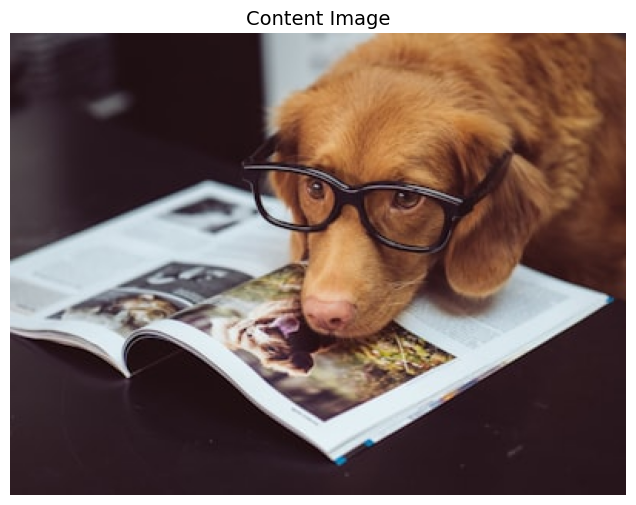

Image loaded - Size: (400, 300)

🎨 STYLE IMAGE (how to paint it):
Error loading image: cannot identify image file <_io.BytesIO object at 0x39c89e7a0>


In [21]:
# Let's see our source images
print("📷 CONTENT IMAGE (what to paint):")
content_img, content_array = display_image(content_image_url, "Content Image")

print("\n🎨 STYLE IMAGE (how to paint it):")
style_img, style_array = display_image(style_image_url, "Style Image - Van Gogh's Starry Night")

In [22]:
# Prepare both images for the AI artist
print("🔧 Preparing images for AI art creation...")

# Process content image
content_image = tf.convert_to_tensor(content_array, dtype=tf.float32)
content_image = tf.image.resize(content_image, (256, 256)) / 255.0
content_image = tf.expand_dims(content_image, axis=0)
                               
# Process style image  
style_image = tf.convert_to_tensor(style_array, dtype=tf.float32)
style_image = tf.image.resize(style_image, (256, 256)) / 255.0
style_image = tf.expand_dims(style_image, axis=0)

print("✅ Images ready for artistic transformation!")


🔧 Preparing images for AI art creation...


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
# 🎨 The magic happens here! AI creates art!
print("🤖 AI is painting... combining content with Van Gogh's style...")
stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]
print("✅ Masterpiece created!")

In [ ]:
# 🖼️ Reveal the AI artwork!
plt.figure(figsize=(10, 8))
plt.imshow(stylized_image[0])
plt.title('🎨 AI-Generated Artwork\n(Original photo painted in Van Gogh style!)', fontsize=16)
plt.axis('off')
plt.show()

print("🎉 Amazing! The AI combined your photo with Van Gogh's painting style!")
print("💡 Try different images and see what the AI creates!")

### 🎮 Challenge 3: Become an AI Art Critic!

**Your Mission**: Test the style transfer with different combinations and rate the results!

**Experiment with**:
- Different artistic styles (Picasso, Monet, modern art)
- Various content images (portraits, landscapes, architecture)  
- Unusual combinations (cartoon + classical art, etc.)

**Alternative Models to Try**:
- 🔗 **TensorFlow Style Transfer Tutorial**: https://www.tensorflow.org/tutorials/generative/style_transfer
- 🔗 **PyTorch Neural Style Tutorial**: https://pytorch.org/tutorials/advanced/neural_style_tutorial.html

**Questions to explore**:
- Which style-content combinations work best?
- What makes a "successful" style transfer?
- How does this compare to human artists?
- Could this help or hurt human creativity? 

## Section 4: Semantic Text Similarity
**Measuring Meaning in Language**

Semantic similarity measures how closely related two pieces of text are in meaning, beyond simple word matching. This technology is fundamental to search engines, recommendation systems, and natural language understanding applications.

We'll use BERT embeddings to compute similarity scores between sentence pairs. 

In [ ]:
# Load BERT model for semantic similarity
print("Loading BERT language model...")
print("BERT (Bidirectional Encoder Representations from Transformers)")
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
print("BERT model loaded successfully")

In [ ]:
def get_sentence_embedding(sentence):
    # Tokenize the input sentence
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=512)
    # Get the hidden states from the model
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the mean of the token embeddings from the last hidden state
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.numpy()

In [ ]:
def compute_similarity(sentence1, sentence2):
    # Get sentence embeddings for both sentences
    embedding1 = get_sentence_embedding(sentence1)
    embedding2 = get_sentence_embedding(sentence2)
    # Compute cosine similarity between the embeddings
    similarity = cosine_similarity(embedding1, embedding2)[0][0]
    return similarity

In [ ]:
# Test different sentence pairs to see how similar they are
sentence_pairs = [
    ("AI is transforming the world.", "Artificial intelligence is changing everything."),
    ("The cat is sleeping peacefully.", "A feline is napping quietly."),
    ("I love pizza!", "Pizza is terrible."),
    ("The weather is sunny today.", "Today is a bright, clear day."),
    ("Programming is fun!", "I hate vegetables.")
]

print("🔍 Testing these sentence pairs for similarity:")
for i, (s1, s2) in enumerate(sentence_pairs, 1):
    print(f"\n{i}. Sentence A: '{s1}'")
    print(f"   Sentence B: '{s2}'")

In [ ]:
# Let's see how similar each pair is!
print("\n🤖 AI Similarity Analysis Results:")
print("=" * 50)

for i, (sentence1, sentence2) in enumerate(sentence_pairs, 1):
    similarity_score = compute_similarity(sentence1, sentence2)
    
    # Add interpretation
    if similarity_score > 0.8:
        interpretation = "Very Similar! 🎯"
    elif similarity_score > 0.6:
        interpretation = "Quite Similar 👍"
    elif similarity_score > 0.4:
        interpretation = "Somewhat Similar 🤔"
    else:
        interpretation = "Not Very Similar 🚫"
    
    print(f"\n{i}. Pair {i}:")
    print(f"   A: '{sentence1}'")
    print(f"   B: '{sentence2}'")
    print(f"   Similarity: {similarity_score:.3f} - {interpretation}")

print("\n💡 1.0 means identical, 0.0 means completely different!")

In [ ]:
# 🎮 YOUR TURN! Test your own sentences
# Try to find two sentences that seem similar to you but confuse the AI

your_sentence1 = "Change this to your first sentence"
your_sentence2 = "Change this to your second sentence"

your_similarity = compute_similarity(your_sentence1, your_sentence2)

if your_similarity > 0.8:
    interpretation = "Very Similar! 🎯"
elif your_similarity > 0.6:
    interpretation = "Quite Similar 👍"
elif your_similarity > 0.4:
    interpretation = "Somewhat Similar 🤔"
else:
    interpretation = "Not Very Similar 🚫"

print("🔍 Your Sentence Similarity Test:")
print(f"Sentence 1: '{your_sentence1}'")
print(f"Sentence 2: '{your_sentence2}'")
print(f"AI Similarity Score: {your_similarity:.3f} - {interpretation}")
print("\n🏆 Challenge: Can you get a score of exactly 0.500?")

### 🎮 Challenge 4: The Similarity Score Olympics!

**Your Mission**: Test the AI's understanding of language similarity!

**Challenges to try**:
1. **The Perfect Match**: Can you find two different sentences that get a similarity score of exactly 0.900?
2. **The Synonym Test**: Do synonyms always get high scores? Test "big" vs "large", "happy" vs "joyful"
3. **The Translation Test**: Compare "Hello" with "Hola" (or other languages you know)
4. **The Context Test**: Do sentences with the same words but different meanings confuse the AI?

**Examples to explore**:
- "The bank was closed" vs "The river bank was muddy"
- "Time flies like an arrow" vs "Fruit flies like a banana"  
- "I saw her duck" vs "I saw her duck under the table"

**Discussion Points**:
- When does the AI get similarity "wrong" in your opinion?
- How might cultural context affect similarity scores?
- What are the limitations of measuring meaning mathematically?

### 🏆 **Leaderboard Challenge**: Who can achieve the highest similarity score between two completely different-looking sentences? 

## Current AI Tools and Applications

The AI landscape is rapidly evolving. Here are some notable current applications and tools that demonstrate the practical impact of AI technologies:

### Image Generation and Computer Vision
- **DALL-E 3** (OpenAI): Text-to-image generation → https://openai.com/dall-e-3
- **Midjourney**: AI art generation platform → https://midjourney.com
- **Stable Diffusion**: Open-source image generation → https://stablediffusionweb.com

### Natural Language Processing
- **ChatGPT**: Conversational AI system → https://chatgpt.com
- **Claude**: AI assistant by Anthropic → https://claude.ai
- **Perplexity**: AI-enhanced search engine → https://perplexity.ai

### Audio and Media Processing
- **Suno**: AI music generation → https://suno.com
- **ElevenLabs**: Voice synthesis and cloning → https://elevenlabs.io
- **RunwayML**: AI-powered video editing → https://runwayml.com

### Development Tools
- **GitHub Copilot**: AI code completion
- **Codeium**: AI programming assistant
- Many of these tools can be integrated with or run alongside Google Colab

### Exploration Activities

**Practical exercises to deepen understanding**:

1. **Prompt Engineering**: Experiment with different text inputs for AI image generators
2. **Comparative Analysis**: Test the same prompt across different AI chat systems
3. **Technical Investigation**: Use ChatGPT or similar tools to explain code snippets from this notebook
4. **Creative Applications**: Generate content (music, images, text) and analyse the results

### Discussion Topics

Consider these questions as you explore AI applications:
- Which demonstration was most impressive from a technical standpoint?
- What are the potential societal implications of these technologies?
- How might AI development affect different industries and professions?
- What ethical considerations should guide AI development and deployment?

### Course Overview

This introductory session provides a foundation for the following topics:

- **Day 2**: Python programming fundamentals and data preprocessing
- **Day 3**: Supervised machine learning algorithms and evaluation
- **Day 4**: Unsupervised learning techniques and pattern discovery  
- **Day 5**: Neural networks and deep learning architectures
- **Day 6**: Natural language processing and text analysis
- **Day 8**: Reinforcement learning and decision-making systems
- **Day 10**: Modern AI frameworks and implementation tools

### Saving and Sharing Your Work

**Google Colab Options**:
- Save to Google Drive: File → Save a copy in Drive
- Share with others: File → Share (similar to Google Docs)
- Export notebook: File → Download → Download .ipynb

### Summary

Today's demonstrations showcased several core AI capabilities that are transforming multiple industries. You've seen practical implementations of sentiment analysis, computer vision, neural style transfer, and semantic similarity measurement.

These technologies represent just a fraction of current AI capabilities. As we progress through the course, you'll gain deeper understanding of the underlying principles and learn to implement similar systems yourself.

**The field of AI continues to evolve rapidly - you're now equipped to explore and understand these developments.** 